# Mountain Car SARSA

[0.6  0.07]
[-1.2  -0.07]
3
Episode:0 avg:-200.0 min:-200.0 max:-200.0
Episode:500 avg:-199.97 min:-200.0 max:-185.0
Episode:1000 avg:-200.0 min:-200.0 max:-200.0
Episode:1500 avg:-199.988 min:-200.0 max:-194.0
Episode:2000 avg:-199.522 min:-200.0 max:-158.0
Episode:2500 avg:-199.688 min:-200.0 max:-160.0
Episode:3000 avg:-197.862 min:-200.0 max:-149.0
Episode:3500 avg:-197.762 min:-200.0 max:-150.0
Episode:4000 avg:-196.654 min:-200.0 max:-144.0
Episode:4500 avg:-196.922 min:-200.0 max:-150.0
Episode:5000 avg:-188.332 min:-200.0 max:-117.0
Episode:5500 avg:-186.846 min:-200.0 max:-113.0
Episode:6000 avg:-188.014 min:-200.0 max:-112.0
Episode:6500 avg:-176.478 min:-200.0 max:-109.0
Episode:7000 avg:-160.824 min:-200.0 max:-109.0
Episode:7500 avg:-152.468 min:-200.0 max:-87.0
Episode:8000 avg:-133.988 min:-200.0 max:-87.0
Episode:8500 avg:-135.426 min:-200.0 max:-86.0
Episode:9000 avg:-136.452 min:-200.0 max:-86.0
Episode:9500 avg:-136.976 min:-200.0 max:-87.0
Episode:10000 avg:-137.666

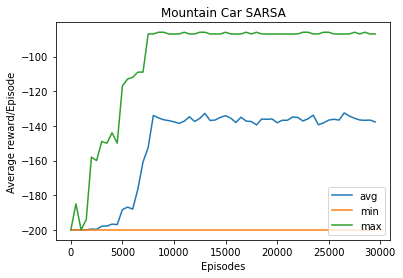

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt 

env = gym.make("MountainCar-v0")

#Environment values
print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

DISCRETE_BUCKETS = 20
EPISODES = 30000
DISCOUNT = 0.95
EPISODE_DISPLAY = 500
LEARNING_RATE = 0.1
EPSILON = 0.5
EPSILON_DECREMENTER = EPSILON/(EPISODES//4)

#Q-Table of size DISCRETE_BUCKETS*DISCRETE_BUCKETS*env.action_space.n
Q_TABLE = np.random.randn(DISCRETE_BUCKETS,DISCRETE_BUCKETS,env.action_space.n)

# For stats
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

def discretised_state(state):
    DISCRETE_WIN_SIZE = (env.observation_space.high-env.observation_space.low)/[DISCRETE_BUCKETS]*len(env.observation_space.high)
    discrete_state = (state-env.observation_space.low)//DISCRETE_WIN_SIZE
    return tuple(discrete_state.astype(np.int))#integer tuple as we need to use it later on to extract Q table values

for episode in range(EPISODES):
    episode_reward = 0
    done = False

    if episode % EPISODE_DISPLAY == 0:
        render_state = True
    else:
        render_state = False

    curr_discrete_state = discretised_state(env.reset())
    if np.random.random() > EPSILON:
        action = np.argmax(Q_TABLE[curr_discrete_state])
    else:
        action = np.random.randint(0, env.action_space.n)

    while not done:
        new_state, reward, done, _ = env.step(action)
        new_discrete_state = discretised_state(new_state)

        if np.random.random() > EPSILON:
            new_action = np.argmax(Q_TABLE[new_discrete_state])
        else:
            new_action = np.random.randint(0, env.action_space.n)

        #if render_state:
        #env.render()

        if not done:
            current_q = Q_TABLE[curr_discrete_state+(action,)]
            max_future_q = Q_TABLE[new_discrete_state+(new_action,)]
            new_q = current_q + LEARNING_RATE*(reward+DISCOUNT*max_future_q-current_q)
            Q_TABLE[curr_discrete_state+(action,)]=new_q
        elif new_state[0] >= env.goal_position:
            Q_TABLE[curr_discrete_state + (action,)] = 0

        curr_discrete_state = new_discrete_state
        action = new_action

        episode_reward += reward

    EPSILON = EPSILON - EPSILON_DECREMENTER

    ep_rewards.append(episode_reward)

    if not episode % EPISODE_DISPLAY:
        avg_reward = sum(ep_rewards[-EPISODE_DISPLAY:])/len(ep_rewards[-EPISODE_DISPLAY:])
        ep_rewards_table['ep'].append(episode)
        ep_rewards_table['avg'].append(avg_reward)
        ep_rewards_table['min'].append(min(ep_rewards[-EPISODE_DISPLAY:]))
        ep_rewards_table['max'].append(max(ep_rewards[-EPISODE_DISPLAY:]))
        
        print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-EPISODE_DISPLAY:])} max:{max(ep_rewards[-EPISODE_DISPLAY:])}")

env.close()

plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4) #bottom right
plt.title('Mountain Car SARSA')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()

# Mountain Car Q-Learning

[0.6  0.07]
[-1.2  -0.07]
3
Episode:0 avg:-200.0 min:-200.0 max:-200.0
Episode:500 avg:-200.0 min:-200.0 max:-200.0
Episode:1000 avg:-200.0 min:-200.0 max:-200.0
Episode:1500 avg:-199.958 min:-200.0 max:-179.0
Episode:2000 avg:-199.858 min:-200.0 max:-172.0
Episode:2500 avg:-199.422 min:-200.0 max:-156.0
Episode:3000 avg:-198.658 min:-200.0 max:-151.0
Episode:3500 avg:-197.954 min:-200.0 max:-150.0
Episode:4000 avg:-197.8 min:-200.0 max:-153.0
Episode:4500 avg:-195.214 min:-200.0 max:-148.0
Episode:5000 avg:-195.686 min:-200.0 max:-140.0
Episode:5500 avg:-194.59 min:-200.0 max:-131.0
Episode:6000 avg:-190.664 min:-200.0 max:-117.0
Episode:6500 avg:-184.322 min:-200.0 max:-119.0
Episode:7000 avg:-173.128 min:-200.0 max:-113.0
Episode:7500 avg:-168.966 min:-200.0 max:-136.0
Episode:8000 avg:-153.758 min:-185.0 max:-136.0
Episode:8500 avg:-153.046 min:-179.0 max:-137.0
Episode:9000 avg:-152.446 min:-180.0 max:-136.0
Episode:9500 avg:-152.574 min:-174.0 max:-136.0
Episode:10000 avg:-152.17

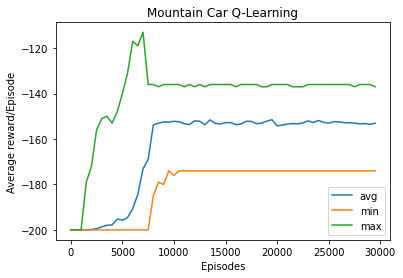

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt 

env = gym.make("MountainCar-v0")

print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

DISCRETE_BUCKETS = 20
EPISODES = 30000
DISCOUNT = 0.95
EPISODE_DISPLAY = 500
LEARNING_RATE = 0.1
EPSILON = 0.5
EPSILON_DECREMENTER = EPSILON/(EPISODES//4)

#Q-Table of size DISCRETE_BUCKETS*DISCRETE_BUCKETS*env.action_space.n
Q_TABLE = np.random.randn(DISCRETE_BUCKETS,DISCRETE_BUCKETS,env.action_space.n)

# For stats
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

def discretised_state(state):
    DISCRETE_WIN_SIZE = (env.observation_space.high-env.observation_space.low)/[DISCRETE_BUCKETS]*len(env.observation_space.high)
    discrete_state = (state-env.observation_space.low)//DISCRETE_WIN_SIZE
    return tuple(discrete_state.astype(np.int)) #integer tuple as we need to use it later on to extract Q table values

for episode in range(EPISODES):
    episode_reward = 0
    done = False

    curr_discrete_state = discretised_state(env.reset())

    if episode % EPISODE_DISPLAY == 0:
        render_state = True
    else:
        render_state = False

    while not done:
        if np.random.random() > EPSILON:
            action = np.argmax(Q_TABLE[curr_discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
    
        new_state, reward, done, _ = env.step(action)
        new_discrete_state = discretised_state(new_state)
        #if render_state:
        #	env.render()

        if not done:
            max_future_q = np.max(Q_TABLE[new_discrete_state])
            current_q = Q_TABLE[curr_discrete_state+(action,)]
            new_q = current_q + LEARNING_RATE*(reward + DISCOUNT*max_future_q - current_q)
            Q_TABLE[curr_discrete_state+(action,)]=new_q
        elif new_state[0] >= env.goal_position:
            Q_TABLE[curr_discrete_state + (action,)] = 0

        curr_discrete_state = new_discrete_state
        episode_reward += reward

    EPSILON = EPSILON - EPSILON_DECREMENTER

    ep_rewards.append(episode_reward)

    if not episode % EPISODE_DISPLAY:
        avg_reward = sum(ep_rewards[-EPISODE_DISPLAY:])/len(ep_rewards[-EPISODE_DISPLAY:])
        ep_rewards_table['ep'].append(episode)
        ep_rewards_table['avg'].append(avg_reward)
        ep_rewards_table['min'].append(min(ep_rewards[-EPISODE_DISPLAY:]))
        ep_rewards_table['max'].append(max(ep_rewards[-EPISODE_DISPLAY:]))
        
        print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-EPISODE_DISPLAY:])} max:{max(ep_rewards[-EPISODE_DISPLAY:])}")

env.close()

plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4) #bottom right
plt.title('Mountain Car Q-Learning')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()
